In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

1. Perform data exploration and required pre processing.

In [267]:
sa = pd.read_csv('SAHeart.csv')

In [268]:
sa.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [269]:
sa.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [270]:
sa.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [271]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [272]:
sa['famhist'] = sa['famhist'].map({'Present': 1, 'Absent': 0})

In [273]:
sa['chd'] = sa['chd'].map({'Si': 1, 'No': 0})

In [274]:
sa.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [275]:
num = sa.groupby('chd',as_index=False).count()

[Text(0.5, 0, 'Coronary Heart Disease'), Text(0, 0.5, 'Number of people')]

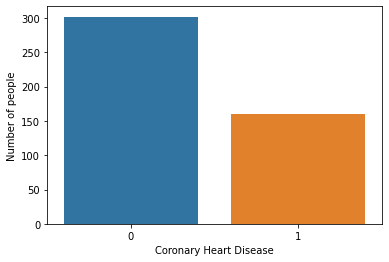

In [276]:
ax = sns.barplot(x=num["chd"], y=num["sbp"], data=num)
ax.set(xlabel='Coronary Heart Disease', ylabel='Number of people')

<AxesSubplot:xlabel='age', ylabel='Count'>

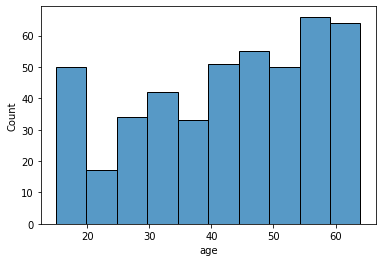

In [277]:
sns.histplot(data=sa, x="age")

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

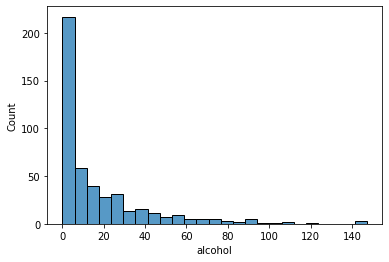

In [542]:
sns.histplot(data=sa, x="alcohol")

2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model
fitting in one step. Build a logistic regression model to predict the probability of getting chd
(Coronary Heart Disease), that is, P(chd = ‘Si”). Use all other columns except chd as features to build
the model.

In [278]:
x = sa.loc[:, sa.columns != 'chd']
y = sa["chd"]
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42)

In [279]:
pipe = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression())])

In [280]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [281]:
pipe.score(x_test, y_test)

0.75

In [282]:
y_pred = pipe.predict(x_test)


3. Find out which features are actually relevant to the class label. Build a new logistic regression
model using only the significant features.

In [283]:
sa.corrwith(sa["chd"]).sort_values(ascending=False)

chd          1.000000
age          0.372973
tobacco      0.299718
famhist      0.272373
ldl          0.263053
adiposity    0.254121
sbp          0.192354
typea        0.103156
obesity      0.100095
alcohol      0.062531
dtype: float64

In [536]:
X_new = SelectKBest(chi2, k=5).fit(x, y)
#X_new.shape

In [537]:
X_new

SelectKBest(k=5, score_func=<function chi2 at 0x000002B31D9150D0>)

In [538]:
cols = X_new.get_support(indices=True)
new = x.iloc[:,cols]

In [539]:
cols

array([0, 1, 3, 7, 8], dtype=int64)

In [540]:
new.columns

Index(['sbp', 'tobacco', 'adiposity', 'alcohol', 'age'], dtype='object')

In [541]:
x1 = sa[['tobacco', 'ldl', 'adiposity', 'famhist', 'age']]
y1 = sa["chd"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1,random_state=42)


In [511]:
pipe1 = Pipeline([('scaler1', StandardScaler()), ('log1', LogisticRegression())])
pipe1.fit(x_train1,y_train1)

Pipeline(steps=[('scaler1', StandardScaler()), ('log1', LogisticRegression())])

In [512]:
pipe1.score(x_test1, y_test1)

0.7931034482758621

In [513]:
y_pred1 = pipe1.predict(x_test1)

4. From the logistic regression model parameters, determine and write down which parameters
affect the probability of chd positively and negatively.

In [514]:
coef_array = pipe1.named_steps['log1'].coef_

In [515]:
print(coef_array)

[[ 0.27051177  0.33516263 -0.02814537  0.39190431  0.69727653]]


5. Tabulate and write down the relevant measures of accuracy , Sensitivity and specificity for both
models.

In [516]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred2).ravel()
print(tn, fp, fn, tp)

70 5 23 18


In [517]:
acc = tp/(tp+fp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)

In [518]:
print(acc, sens, spec)

0.782608695652174 0.43902439024390244 0.9333333333333333



6. Visualize the ROC curve and write down the roc_auc and comment on the performance of both
models.

In [519]:
from sklearn import metrics


from sklearn.metrics import roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

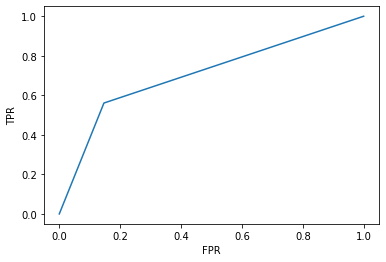

In [520]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [521]:
roc_auc_score(y_test, y_pred)

0.7071544715447154

In [522]:
fpr1, tpr1, _ = metrics.roc_curve(y_test1, y_pred1)

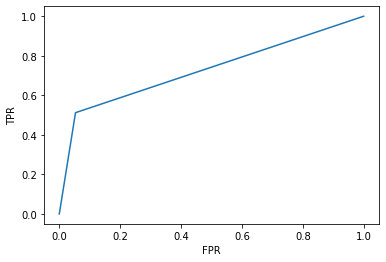

In [523]:
plt.plot(fpr1,tpr1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [524]:
roc_auc_score(y_test1, y_pred1)

0.7294308943089431